In [2]:
import sys
sys.path.append('/Users/syesw/Desktop/reinforcement_learning_tutorial')

##  剪刀石头布游戏

In [3]:
from regretmatching.rps import RPSPlayer
import numpy as np

In [4]:
a = RPSPlayer() # 实例化玩家A
b = RPSPlayer() # 实例化玩家B
t = 10000
for i in range(0, t):
    a_move = a.move()
    b_move = b.move()
    a.learn_from(b_move)
    b.learn_from(a_move)

_2e = np.round(2 * np.max([a.eps(), b.eps()]), 3)
a_ne = a.current_best_response()
b_ne = b.current_best_response()
print("{0} - nash equilibrium for RPS: {1}, {2}".format(_2e, a_ne, b_ne))

0.02 - nash equilibrium for RPS: [0.3299 0.3358 0.3343], [0.3357 0.3343 0.33  ]


## 上校博弈游戏

In [47]:
from regretmatching.cbg import ColonelBlottoPlayer
import matplotlib.pyplot as plt
import numpy as np

In [48]:
S = 3
N = 3

a = ColonelBlottoPlayer(S, N) # 实例化玩家A
b = ColonelBlottoPlayer(S, N) # 实例化玩家B

In [49]:
# a.experts是实例化的experts集合

for i in range(len(a.experts)):
    # 取出每一个expert实例
    action = a.experts[i]
    print(action.distribution)

[0, 0, 3]
[0, 1, 2]
[0, 2, 1]
[0, 3, 0]
[1, 0, 2]
[1, 1, 1]
[1, 2, 0]
[2, 0, 1]
[2, 1, 0]
[3, 0, 0]


0.052 - nash equilibrium for RPS: [1.000e-04 2.377e-01 8.770e-02 2.000e-04 9.150e-02 7.700e-03 2.234e-01
 2.508e-01 1.011e-01 0.000e+00], [0.     0.212  0.092  0.     0.0972 0.0118 0.262  0.235  0.0899 0.    ]


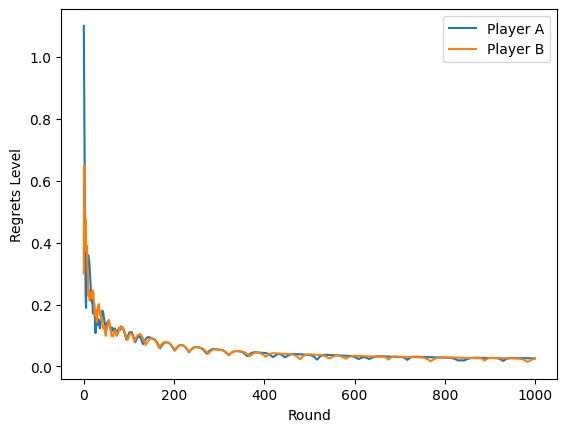

In [50]:
# 开始t次游戏
a_regrets = []
b_regrets = []

t = 1000
for i in range(0, t):
    a_move = a.move()
    b_move = b.move()
    a.learn_from(b_move)
    b.learn_from(a_move)

    # 绘制self.expected_reward的图
    a_regrets.append(a.eps())
    b_regrets.append(b.eps())

_2e = np.round(2 * np.max([a.eps(), b.eps()]), 3)
a_ne = a.current_best_response()
b_ne = b.current_best_response()
print("{0} - nash equilibrium for RPS: {1}, {2}".format(_2e, a_ne, b_ne))

# 绘制图形
plt.figure()
plt.plot(range(t), a_regrets, label='Player A')
plt.plot(range(t), b_regrets, label='Player B')
plt.legend()
plt.xlabel('Round')
plt.ylabel('Regrets Level')
plt.show()